In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 23 10:34:19 2019


Images from 1910 version by: Arthur Edward Waite. Pamela Coleman Smith was the artist 
and worked as an artist 'for hire.' Waite was the copyright holder and he died in 1942. 

Instructions: Run the following in python...

from Tarot import *
my_deck = Tarot()

Notes:
    
    It helps to have a lightweight image viewer for this version as it will open a new window for each image.
    

@author: Steve
"""
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image
import random # Library to create random numbers
import json
#%matplotlib inline
class Tarot:
    '''
    Creates a new instance of a deck of Rider-Waite (1910) Tarot cards.
    Returns a dictionary containing the deck and it attributes.
    
    '''
        
    def __init__(self, deck_name = "Rider Waite", game = 'Celtic Cross'):
#        Default deck attributes
        self.deck_name = deck_name
        self.game = game
        
#        Initialize a dictionary that will store the cards.
        self.deck = {}
        


#        Create the deck specified by the deck name.
        if self.deck_name == 'Rider Waite':
            self._rider_waite()
#        If deck not found notify user and list available decks.
        else:
            print('Deck not found! Enter a valid deck name.')
            print('Tarot Decks Available:')
            print('Rider Waite')

#        Create a list representing the order that the cards are in. It is the length of the deck chosen.
        self.card_order = list(range(len(self.deck)))

#        Choose what game to play!
        if self.game == 'Celtic Cross':
            self._celtic_cross()
        else:
            print('Game not found! Please enter a valid game name.')
            print('Games available for Class Tarot:')
            print('Celtic Cross')


    def _rider_waite(self):
        '''
        Creates a deck of classic 1910 era Rider-Waite cards.
        
        '''
        print(self.deck_name)
        
#        Show the cover card.
#        image = Image.open(self.back)
#        image.show()
#        image.close()


        self.back = '.\images\Original_1910_Back.jpg'
        back = mpi.imread(self.back)
        plt.axis("off")
        image = plt.imshow(back)
        plt.show(image)
        
    



#        The JSON file must already exist. Use the utility .\utils\createRiderWaiteJSONFile.py         
        file_object = open('./data/riderwaite.json', 'r')
        json_object = json.load(file_object)
        
#        The keys of the dictionary need to be converted to integers
        for i in range(len(json_object)):
            key= str(i)
            self.deck[i] = json_object[key]
#        All of the 'top_up' attributes must also be an integer for the boolean conversion to work.
        for i in range(len(self.deck)): self.deck[i]['top_up'] = 1
                    
            
    def _shuffle_cut(self):
        ''' This little program simulates shuffling the deck and then cutting the deck.
        In addition the up or down orientation is randomized for each card.
        '''

        random.seed() # Start up the random number generator with the system time
        random.shuffle(self.card_order)
#        print(self.card_order) # Test to see what the card order is.
        for item in self.card_order:
            self.deck[item]['top_up'] = random.randint(0, 1)

#        Select a 'cut' card. The cut card can also be called the bottom card
#        in that it is at the bottome of the top pile and therefor will be at
#        the bottom of the deck once the cut has been made. 
        cut_card = random.randint(0, len(self.card_order))
        place = self.card_order.index(cut_card)
        top_pile = self.card_order[:place + 1]
#        print(top_pile)
        bottom_pile = self.card_order[place + 1:]
#        print(bottom_pile)
        self.card_order =  bottom_pile + top_pile
#        print(self.card_order)
#
    def _celtic_cross(self):
        '''Classic Rider-Waite Celtic Cross Tarot devination'''
        print(self.game)
#       Create a list of the card order meaning in celtic cross.
        celtic_cross = open("./data/celtic_cross.txt", 'r')
        place_order_meaning = list()
        for line in celtic_cross:
            line = line.rstrip('\n')
            line.strip('\r')
            place_order_meaning.append(line)
        celtic_cross.close()

#Step 1) Select the 'Significator' card
        print('Please choose a topic from the following list which generally best describes the nature of your question.')
        print()
        print('Meditate on the topic and how it relates to your question, then...')
        print()
        print('Enter the number of the topic below.')
        # Ordered by: rank, card_name, suit, symbol, person, description, meaning, reverse meaning
        
#        Print a list if options to chose for the Significator card and its possible meanings.
        for card in range(0, 10):
            print(' ' + str(card) + ': ' + self.deck[card]['symbol'])
        for card in range(10, 22):
            print(str(card) + ': ' + self.deck[card]['symbol'])
#        User input to determine the significator card.
        significator = int(input('Enter the number:'))
        #print(self.card_order)


#Step 2) Pull the Significator card from the full deck before shuffling and cutting the deck three times.
        self.card_order.remove(significator)
            
#Step 3) Shuffle and Cut the deck three times        
        for times in range(0,3): 
                self._shuffle_cut()
#Step 4) Put the order of the top 9 cards in a list.
        dealt_cards = self.card_order[:10]
        
#Step 5) Place the significator card at the beginning of the chosen cards (top of the pile). 
        dealt_cards.insert(0, significator)
#        print(deal_cards) # Test to see if significator was inserted correctly at the beginning.
  
#Show each of the cards chosen starting with the Significator card in the middle
        k=0
        for card in dealt_cards:
            
        # Ordered by: rank, card_name, suit, symbol, person, description, meaning, reverse meaning
            
            image = Image.open(self.deck[card]['face_pic'])
            
            if self.deck[card]['top_up'] == False and k != 0: # The significator card is never reversed in meaning i.e. k!=0.
                image = image.rotate(180)
#            image.show()
            

#            face = mpi.imread(self.deck[card]['face_pic'])
            plt.axis("off")
            if self.deck[card]['top_up'] == False and k != 0: # The significator card is never reversed in meaning i.e. k!=0.
                image = image.rotate(180)
            face = plt.imshow(image)
            plt.show(face)
            
#            print('\n' * 10)
            print('~' * 25)
            print(self.deck[card]['card_name'])
            print()
            print(place_order_meaning[k])
            print()
            print('It could also represent a...')
            print(self.deck[card]['person'])
            print()
            print('Card Description...')
            print(self.deck[card]['description'])
            print()
            print('Card Meaning...')
            if self.deck[card]['top_up'] == False and k != 0:
                print(self.deck[card]['reverse'])        
            else:
                print(self.deck[card]['meaning'])
            
            k+=1                 
            
#            cont = input('To continue select Enter:')
#            if cont == "k":
            image.close()
        return()
#            image.close()
        
        


Rider Waite


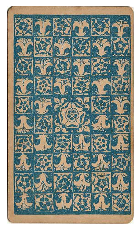

Celtic Cross
Please choose a topic from the following list which generally best describes the nature of your question.

Meditate on the topic and how it relates to your question, then...

Enter the number of the topic below.
 0: Ignorance
 1: Divinity
 2: Universal Law
 3: Gaia
 4: Worldly Power
 5: Esoteric
 6: Creation
 7: Enlightenment
 8: Compassion
 9: Light
10: Change
11: Justice
12: Sacrifice
13: Transition
14: Abundance
15: Evil
16: Greed
17: Life
18: Imagination
19: Innocence
20: Freedom
21: Wisdom
Enter the number:14


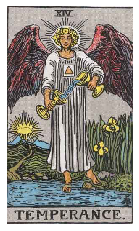

~~~~~~~~~~~~~~~~~~~~~~~~~
Temperance

The Significator Card represents the nature of the question being asked.

It could also represent a...
Charitable Person

Card Description...
A winged angel, with the sign of the sun upon his forehead and on his breast the square and triangle of the septenary.  It is held to be pouring the essences of life from chalice to chalice.

Card Meaning...
Economy, moderation, frugality, management, accommodation.


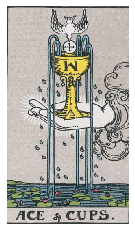

~~~~~~~~~~~~~~~~~~~~~~~~~
Ace of Cups

This card covers him and describes the influence which is affecting the person or subject of inquiry.

It could also represent a...
Person with Light Brown or Fair hair; Grey or Blue eyes.

Card Description...
The waters are beneath, upon which are water lilies. The hand issues from the cloud, holding in its palm the cup, from which four streams are pouring. A dove, bearing in its beak a cross-marked host, descends to place the wafer in the cup the dew of water is falling on all sides. It is an intimation of that which may lie behind the Lesser Arcana.

Card Meaning...
True heart, joy, contentment, abode, nourishment, abundance, fertility, holy table, felicity.


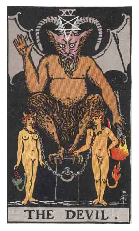

~~~~~~~~~~~~~~~~~~~~~~~~~
The Devil

This card crosses him and shows the nature of the obstacles in this matter. If it is a favourable card, the opposing forces will not be too serious.

It could also represent a...
Servant

Card Description...
The Horned Goat of Mendes, with wings like those of a bat, is standing on an altar. At the pit of the stomach there is the sign of Mercury. The right hand is upraised and extended, being the reverse of that benediction which is given by the Hierophant in the fifth card. In the left hand there is a great flaming torch, inverted towards the earth. A reversed pentagram is on the forehead. There is a ring in front of the altar, from which two chains are carried to the necks of two figures, male and female. 

Card Meaning...
Reversed: Evil fatality, weakness, pettiness, blindness.


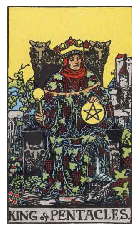

~~~~~~~~~~~~~~~~~~~~~~~~~
King of Pentacles

This card crowns him and represents the Querent's intentions or goals in the matter; or the best that can be achieved under the circumstances.

It could also represent a...
Person with Dark or Tan complexion; Dark eyes; Brown or Black hair.

Card Description...
The figure calls for no special description. The face is rather dark, suggesting also courage, but somewhat lethargic in tendency. The bulls head should be noted as a recurrent symbol on his throne. The sign of this suit is represented throughout as engraved or blazoned with the pentagram, typifying the correspondence of the four elements in human nature and that by which they may be governed.

Card Meaning...
Valor, realizing intelligence, business and normal intellectual aptitude, sometimes mathematical gifts and attainments of this kind success in these paths.


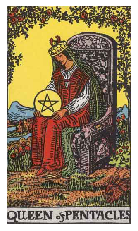

~~~~~~~~~~~~~~~~~~~~~~~~~
Queen of Pentacles

This card is beneath him and lays the foundation or basis of the matter. It represents that which has already manifested itself in relation to the Significator Card.

It could also represent a...
Person with Dark or Tan complexion; Dark eyes; Brown or Black hair.

Card Description...
The face suggests that of a dark woman, whose qualities might be summed up in the idea of greatness of soul. She has also the serious cast of intelligence she contemplates her symbol and may see worlds therein.

Card Meaning...
Reversed: Evil, fear, suspicion, suspense, mistrust.


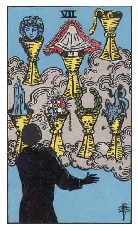

~~~~~~~~~~~~~~~~~~~~~~~~~
Seven of Cups

This card is behind him and gives the influence that recently passed, or is now passing away.

It could also represent a...
Person with Light Brown or Fair hair; Grey or Blue eyes.

Card Description...
Strange chalices of vision.

Card Meaning...
Reversed: Desire, will, determination, project.


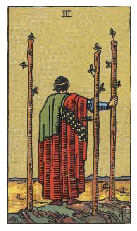

~~~~~~~~~~~~~~~~~~~~~~~~~
Three of Wands

This card is before him and shows the influence that is likely to come into action and operate in the near future.

It could also represent a...
Person with a Light complexion; Blue eyes; Yellow or Auburn hair.

Card Description...
A calm, stately figure, with his back turned, looking from a cliffs edge at ships passing over the sea. Three staves are planted in the ground and he leans slightly on one of them.

Card Meaning...
Reversed: The end of troubles, suspension or end of adversity, disappointment, and toil.


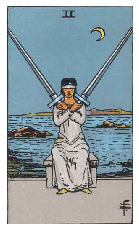

~~~~~~~~~~~~~~~~~~~~~~~~~
Two of Swords

This card signifies the position or attitude of the person or thing represented by the Significator Card.

It could also represent a...
Person with a Dull complexion; Hazel or Grey eyes; Dark Brown hair.

Card Description...
A hoodwinked figure balances two swords upon her shoulders.

Card Meaning...
Reversed: Imposture, falsehood, duplicity, disloyalty.


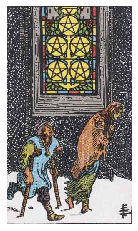

~~~~~~~~~~~~~~~~~~~~~~~~~
Five of Pentacles

This card signifies the environment and other tendencies at work and having an effect on the matter.

It could also represent a...
Person with Dark or Tan complexion; Dark eyes; Brown or Black hair.

Card Description...
Two destitute persons, one crippled, walk in a snowstorm pass the lighted stained glass window of a church.

Card Meaning...
Reversed: Disorder, chaos, ruin, discord, reckless extravagance.


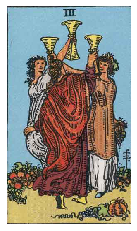

~~~~~~~~~~~~~~~~~~~~~~~~~
Three of Cups

This card gives the hopes or fears in the matter.

It could also represent a...
Person with Light Brown or Fair hair; Grey or Blue eyes.

Card Description...
Maidens in a garden celebrate with cups uplifted, as if pledging to one another.

Card Meaning...
Reversed: Expedition, dispatch, achievement, end.


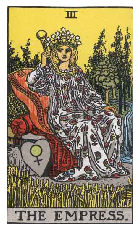

~~~~~~~~~~~~~~~~~~~~~~~~~
The Empress

This card is the most likely outcome or final result brought about by the influences of the other cards that have been turned up.

It could also represent a...
Mother Earth

Card Description...
A stately figure, seated, having rich vestments and royal aspect, as of a daughter of heaven and earth. Her diadem is of twelve stars, gathered in a cluster. The symbol of Venus is on the shield which rests near her. The sceptre which she bears is surmounted by the globe of this world.

Card Meaning...
Reversed: Light, truth, the unraveling of involved matters, public rejoice, also, according to another reading vacillation.


In [5]:
my_deck = Tarot()
